## Emotion Detection From Text Project Using Neural Networks

In [1]:
import tensorflow as tf                                                                                                                                                          #       type: ignore                           
print(tf.__version__)
import keras                                                                                                                                                                                      #       type: ignore                       
keras.__version__

import pandas as pd                                                                                                                                                                                                                                                 # type: ignore
from nltk.corpus import stopwords                                                                                                                                                                                                                                                       # type: ignore
from nltk.stem.porter import PorterStemmer                                                                                                                                                                                                                                  # type: ignore
import re
from sklearn import preprocessing                                                                                                                                                                                           # type: ignore
from sklearn.feature_extraction.text import CountVectorizer                                                                                                                          # Convert a collection of text documents to a matrix of token counts.                                                                                           # type: ignore
from sklearn.model_selection import train_test_split                                                                                                                                                                        # type: ignore
import numpy as np                                                                                                                                                                                                                      # type: ignore
from sklearn.metrics import confusion_matrix                                                                                                                                                         # type: ignore
import matplotlib.pyplot as plt                                                                                                                                                                                                   # type: ignore
import seaborn as sns                                                                                                                                                                                        # type: ignore
from tensorflow.keras.layers import Dropout                                                                                                                                                      # type: ignore
from tensorflow.keras.models import Sequential                                                                                                                                                     # type: ignore
from tensorflow.keras.layers import Dense                                                                                                                                                        # type: ignore
from tensorflow.keras import regularizers                                                                                                                                                         # type: ignore

from tensorflow.keras.callbacks import EarlyStopping                                                                                                                                                                        # type: ignore

2.16.1


## Read dataset

In [2]:

train=pd.read_table('D:/BFCAI 3rd Year/Second Term/Neural Networks/NN Project/train.txt', delimiter = ';', header=None, )
test=pd.read_table('D:/BFCAI 3rd Year/Second Term/Neural Networks/NN Project/test.txt', delimiter = ';', header=None, )
val=pd.read_table('D:/BFCAI 3rd Year/Second Term/Neural Networks/NN Project/val.txt', delimiter = ';', header=None, )

data = pd.concat([train ,  val , test])  # Concatenation between 3 datasets(train, val, test)
data.columns = ["text", "emotion"]    # text ==> sentment,,, label ==> emotion

data.shape
data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
data['emotion'].value_counts() 

emotion
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

C:\Users\ABC 2023\AppData\Local\Temp\ipykernel_3932\4283385550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=data, order=data['emotion'].value_counts().index, palette="husl")


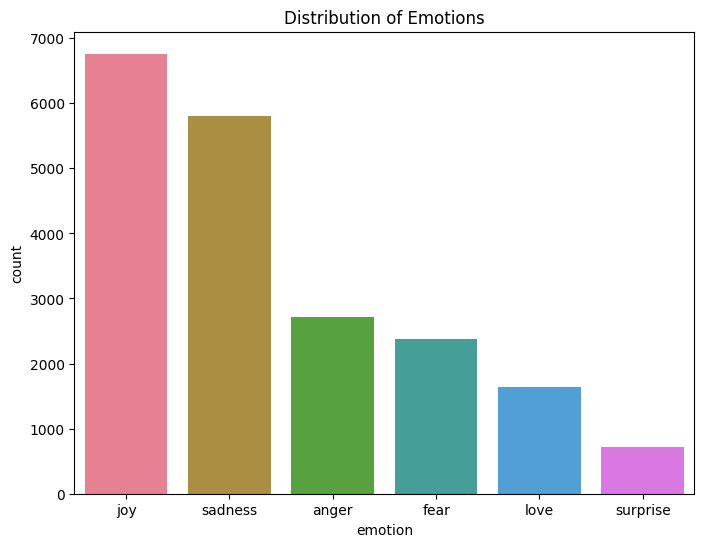

In [4]:
#Bar plot for emotion distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=data, order=data['emotion'].value_counts().index, palette="husl")
plt.title('Distribution of Emotions')
plt.show()

In [5]:
data.isna().any(axis=1).sum()  # Counts the number of rows that contain one or more missing values.

0

## Preprocessing

In [6]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z (Special Characters)
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)


data['clean_data']=data['text'].apply(lambda x: preprocess(x))
data.head()

,text,emotion,clean_data
0,i didnt feel humiliated,sadness,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,feel grouchi


## Print Cleaning data

In [7]:
data['clean_data']

0                                       didnt feel humili
1       go feel hopeless damn hope around someon care ...
2                    im grab minut post feel greedi wrong
3          ever feel nostalg fireplac know still properti
4                                            feel grouchi
                              ...                        
1995    keep feel like someon unkind wrong think get b...
1996              im feel littl cranki neg doctor appoint
1997                feel use peopl give great feel achiev
1998    im feel comfort derbi feel though start step s...
1999    feel weird meet w peopl text like dont talk fa...
Name: clean_data, Length: 20000, dtype: object

In [8]:

label_encoder = preprocessing.LabelEncoder()
data['N_Emotions'] = label_encoder.fit_transform(data['emotion'])  # It encodes the categorical labels into numerical values


In [9]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))                                                                                  #example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

data_cv = cv.fit_transform(data['clean_data']).toarray()

data_cv  # Convert a collection of text documents to a matrix of token counts.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Splitting data

In [10]:
# Splitting the data into training sets and testing sets
X_train, X_test, y_train, y_test =train_test_split(data_cv, data['N_Emotions'], test_size=0.30, random_state=42)

## Building Neural Network Model

In [11]:
model = Sequential()  
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu' , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))   #  to reduce loss and improve generality
model.add(Dense(8, activation='relu' , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2)) ## Applying the regularization technique using L2 regularization to reduce the loss.
model.add(Dense(6, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\ABC 2023\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training Model

In [12]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Stop training if validation loss doesn't improve for 3 epochs

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy Of Training: %.2f' % (accuracy*100))



Epoch 1/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4012 - loss: 1.6819 - val_accuracy: 0.5885 - val_loss: 1.3726
Epoch 2/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5933 - loss: 1.3775 - val_accuracy: 0.6962 - val_loss: 1.2366
Epoch 3/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6519 - loss: 1.2743 - val_accuracy: 0.7327 - val_loss: 1.1598
Epoch 4/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6817 - loss: 1.2134 - val_accuracy: 0.7528 - val_loss: 1.1169
Epoch 5/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6952 - loss: 1.1775 - val_accuracy: 0.7700 - val_loss: 1.0627
Epoch 6/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7078 - loss: 1.1540 - val_accuracy: 0.7662 - val_loss: 1.0409
Epoch 7/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7175 - loss: 1.1188 - val_accuracy: 0.7662 - val_loss: 1.0061
Epoch 8/30
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7209 - loss: 1.0993 - 

## Testing Model

In [13]:
_, accuracy = model.evaluate(X_test, y_test)  # Accuracy for Test Sets
print('Accuracy: %.2f' % (accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8167 - loss: 0.8816
Accuracy: 81.50


## Visualization the training and validation accuracy for each epoch

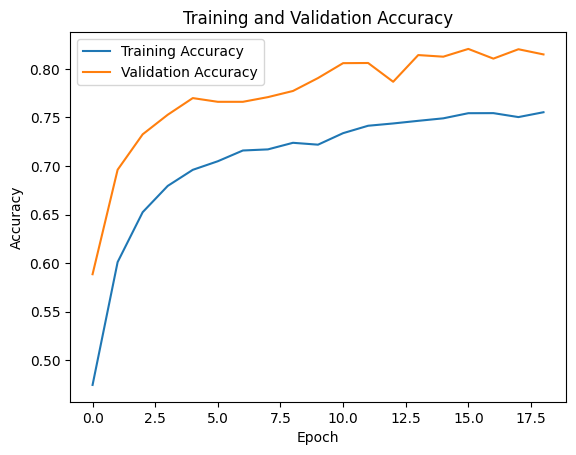

In [14]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [15]:
data['emotion'].value_counts()  

emotion
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

C:\Users\ABC 2023\AppData\Local\Temp\ipykernel_3932\4283385550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=data, order=data['emotion'].value_counts().index, palette="husl")


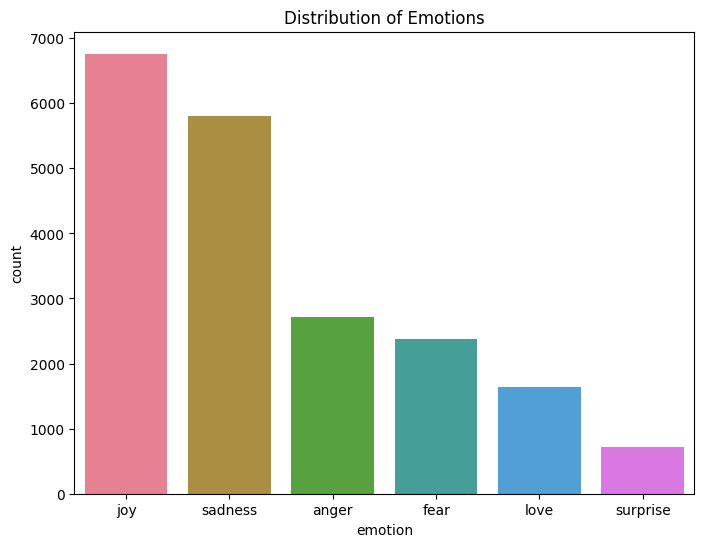

In [16]:
#Bar plot for emotion distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=data, order=data['emotion'].value_counts().index, palette="husl")
plt.title('Distribution of Emotions')
plt.show()

## Confusion Matrix

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


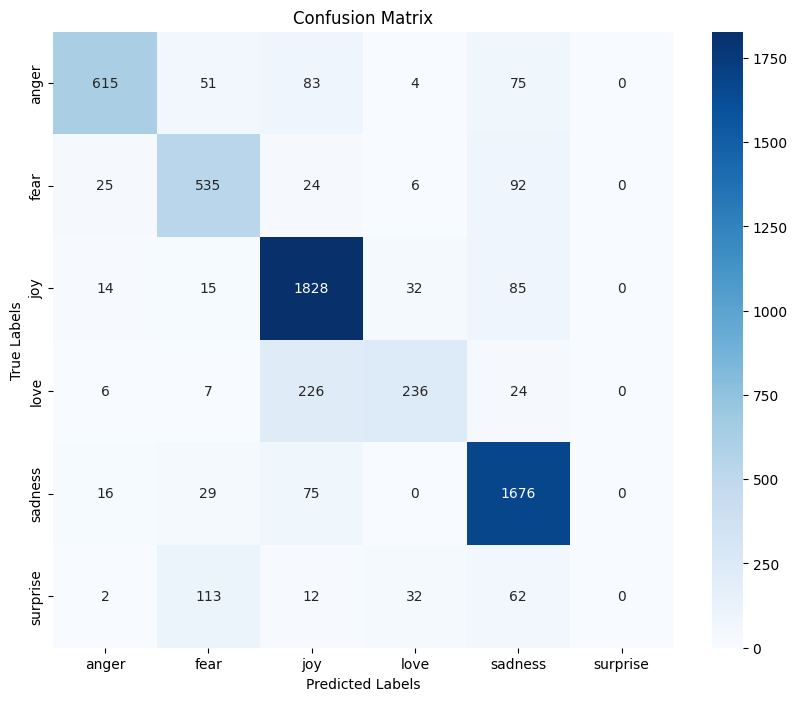

In [17]:

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Examples For Testing Model 

## Example 1

In [18]:
text = 'I wake up every morning with a heaviness in my heart, missing what used to be'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)                            
label_encoder.inverse_transform(a)[0] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'sadness'

## Example 2

In [19]:
text='I can not believe you did that! I am so angry'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)                            
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'anger'

## Example 3

In [20]:
text= 'I am afraid of the looks of discomfort and pit'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)                            
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'fear'

## Example 4

In [21]:
# text= 'My love for you knows no bounds.'
# text=preprocess(text)
# array = cv.transform([text]).toarray()
# pred = model.predict(array)
# a=np.argmax(pred, axis=1)                            
# label_encoder.inverse_transform(a)[0] 

## Example 5

In [22]:

text= '"I adore you, my beloved'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)                            
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'love'

## Example 6

In [23]:

text= 'i feel humiliated'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)                            
label_encoder.inverse_transform(a)[0]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'sadness'

## Example 7

In [24]:
text= 'I am very happy to see you'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)                            
label_encoder.inverse_transform(a)[0]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'joy'

## Example 8

In [25]:

text = '''
Standing alone in the darkness of the night, 
I embraced the silence with all my pent-up sorrow, 
feeling the weight of pain inhabit every cell of my being.
'''
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)                            
label_encoder.inverse_transform(a)[0]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'sadness'

## Saving Model

In [26]:
tf.keras.models.save_model(model,'my_model.h5')  ## Save Model